In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Print a confirmation message indicating that libraries were successfully imported
print('"Libraries successfully imported"')

"Libraries successfully imported"


In [2]:
# Load dataset from a CSV file into a DataFrame
df = pd.read_csv('survey.csv')

# Display the first few rows of the DataFrame
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# Display summary statistics of the DataFrame using describe()
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [4]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(1259, 27)

In [5]:
# Display concise information about the DataFrame using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
# Check for the total number of missing data in the dataset

# Check if there is any missing data in the DataFrame
if df.isnull().sum().sum() == 0:
    print('There is no missing data in our dataset.')
else:
    # Print the total number of missing data in the dataset
    print('There is {} missing data in our dataset.'.format(df.isnull().sum().sum()))

There is 1892 missing data in our dataset.


In [7]:
# Check which columns have missing data and find the number of unique features for each column

# Concatenate the information about missing data, number of unique features, and data types
frame = pd.concat([df.isnull().sum(), df.nunique(), df.dtypes], axis=1, sort=False)

# Display the resulting DataFrame
frame

,0,1,2
Timestamp,0,1246,object
Age,0,53,int64
Gender,0,49,object
Country,0,48,object
state,515,45,object
self_employed,18,2,object
family_history,0,2,object
treatment,0,2,object
work_interfere,264,4,object
no_employees,0,6,object


In [8]:
# Drop columns that are irrelevant for the analysis or contain too much missing data

# List of columns to be dropped
columns_to_drop = ['state', 'comments', 'Timestamp']

# Iterate through each column in the list
for column in columns_to_drop:
    # Check if the column exists in the DataFrame
    if column in df.columns:
        # Drop the specified column
        df = df.drop(columns=[column])

# Display the DataFrame after dropping columns
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [9]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [10]:
#Look at what is in the 'Work_interfere' column to choose a suitable method to fill nan values.
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

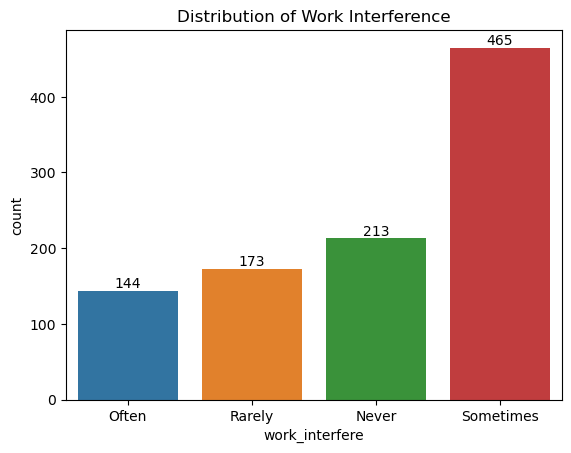

In [11]:
# Plot the distribution of 'work_interfere'

# Create a countplot for the 'work_interfere' column
work_interfere_count_plot = sns.countplot(data=df, x='work_interfere')

# Add labels to the bars in the countplot with the count of occurrences
work_interfere_count_plot.bar_label(work_interfere_count_plot.containers[0])

# Set the title of the plot
plt.title('Distribution of Work Interference')

# Show the plot
plt.show()

In [12]:
# Replace missing data in the 'work_interfere' column with its modal value
df['work_interfere'] = np.ravel(SimpleImputer(strategy='most_frequent').fit_transform(df['work_interfere'].values.reshape(-1, 1)))

# Replace missing data in the 'self_employed' column with its modal value
df['self_employed'] = np.ravel(SimpleImputer(strategy='most_frequent').fit_transform(df['self_employed'].values.reshape(-1, 1)))

# Display the first few rows of the DataFrame after imputing missing values
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


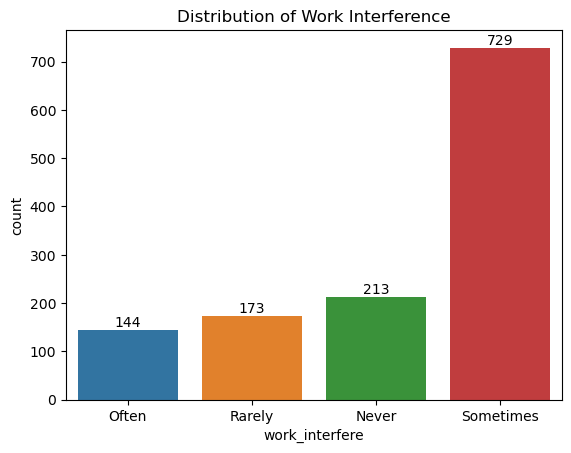

In [13]:
# Confirm there are no more null values in the 'work_interfere' column

# Create a countplot for the 'work_interfere' column
work_interfere_count_plot = sns.countplot(data=df, x='work_interfere')

# Add labels to the bars in the countplot with the count of occurrences
work_interfere_count_plot.bar_label(work_interfere_count_plot.containers[0])

# Set the title of the plot
plt.title('Distribution of Work Interference')

# Show the plot
plt.show()

In [14]:
# Check the unique values in the 'Gender' column

# Print the unique values in the 'Gender' column
print("Unique values in 'Gender' column:", df['Gender'].unique())

# Print an empty line and a separator for better readability
print('\n' + '-' * 92 + '\n')

# Check the number of unique values in the 'Gender' column

# Print the number of unique values in the 'Gender' column
print('Number of unique values in the "Gender" column:', df['Gender'].nunique())

Unique values in 'Gender' column: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

--------------------------------------------------------------------------------------------

Number of unique values in the "Gender" column: 49


In [15]:
# Cleaning up the 'Gender' column to make it more uniform

# Replace various gender values with standardized categories ('Male', 'Female', 'Other')
df['Gender'].replace( 
    ['Male ', 'male', 'M', 'm', 'Male', 'Cis Male', 'Man', 'cis male', 'Mail',
     'Male-ish', 'Male (CIS)', 'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make'],
    'Male', inplace=True
)

df['Gender'].replace(
    ['Female ', 'female', 'F', 'f', 'Woman', 'Female', 'femail', 'Cis Female',
     'cis-female/femme', 'Femake', 'Female (cis)', 'woman'],
    'Female', inplace=True
)

df["Gender"].replace(
    ['Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Androgyne',
     'Trans-female', 'male leaning androgynous', 'Agender', 'A little about you', 'Nah',
     'All', 'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby', 'p',
     'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman'],
    'Other', inplace=True
)

# Print unique values in the 'Gender' column after cleaning
print("Unique values in 'Gender' column after cleaning:", df['Gender'].unique())

# Print unique values in the 'no_employees' column
print("Unique values in 'no_employees' column:", df['no_employees'].unique())

Unique values in 'Gender' column after cleaning: ['Female' 'Male' 'Other']
Unique values in 'no_employees' column: ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']


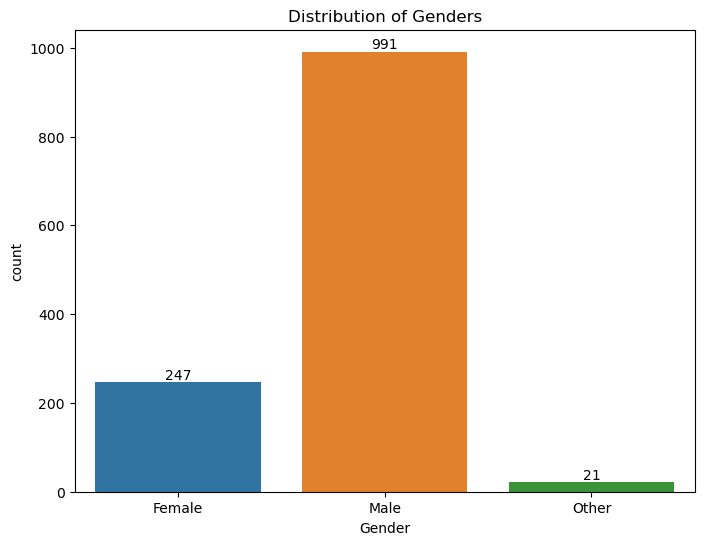

In [16]:
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Create a countplot for the 'Gender' column after cleaning and new categorization
gender_count_plot = sns.countplot(data=df, x='Gender')

# Add labels to the bars in the countplot with the count of occurrences
gender_count_plot.bar_label(gender_count_plot.containers[0])

# Set the title of the plot
plt.title('Distribution of Genders')

# Show the plot
plt.show()

In [17]:
#Confirmation that the dataset is clean
# Check for missing data in the DataFrame
missing_data_count = df.isnull().sum().sum()

# Check if there is any missing data
if missing_data_count == 0:
    print('There is no missing data.')
else:
    print('There is {} missing data.'.format(missing_data_count))

There is no missing data.


In [18]:
# Check for duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()

# Check if there are any duplicate rows
if duplicate_count == 0:
    print('There is no duplicate row.')
else:
    print('There are {} duplicate rows.'.format(duplicate_count))
    
    # Remove duplicate rows from the DataFrame
    df.drop_duplicates(inplace=True)
    
    # Print a separator line
    print('-'*92)

# Check again for duplicate rows after removal
print('Number of duplicate rows after removal:', df.duplicated().sum())

There are 4 duplicate rows.
--------------------------------------------------------------------------------------------
Number of duplicate rows after removal: 0


In [19]:
#Check for unique values in 'Age' column
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [20]:
# Remove rows with 'Age' values outside the valid range (18 to 72)
df.drop(df[(df['Age'] < 18) | (df['Age'] > 72)].index, inplace=True)

# Print the unique values of the 'Age' column after removing invalid values
print(df['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]


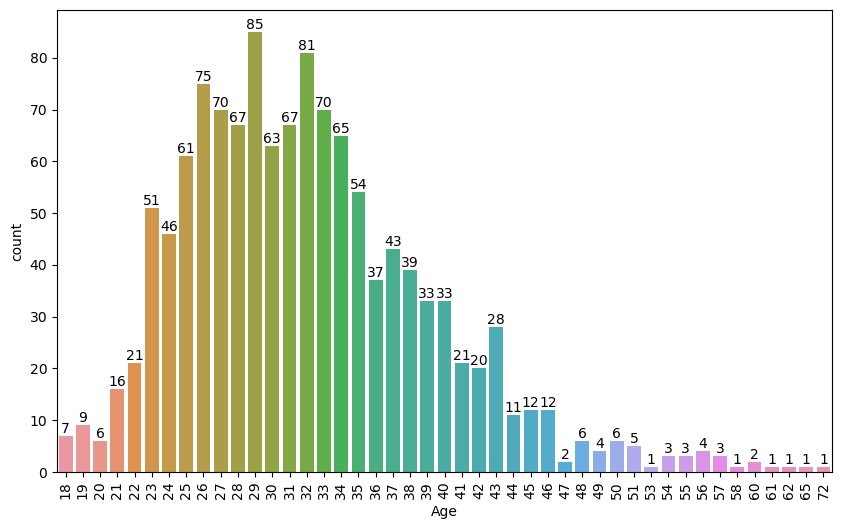

In [21]:
#Visualizing the distribution of Age 
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a countplot to visualize the distribution of 'Age'
age_range_plot = sns.countplot(data=df, x='Age')

# Add labels to the bars in the countplot with the count of occurrences
age_range_plot.bar_label(age_range_plot.containers[0])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

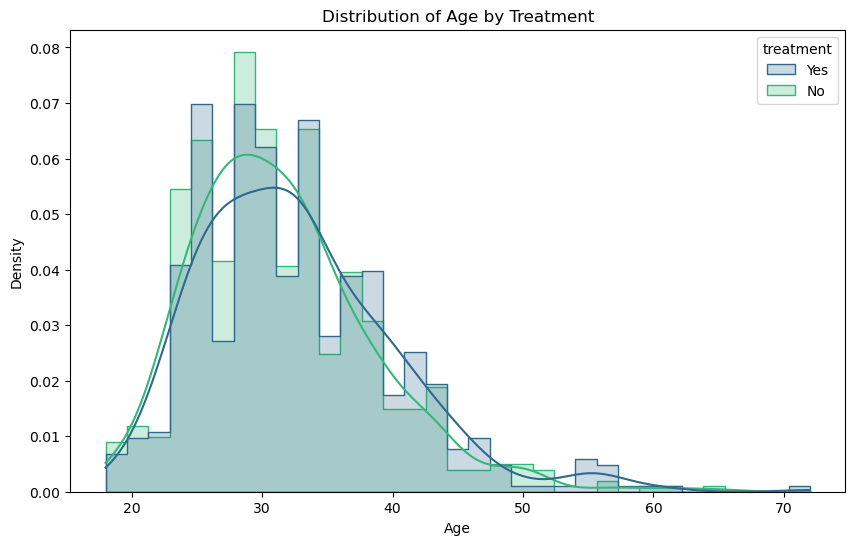

In [22]:
#Plot the Age distribution against Treatment, including the Kernel Density 
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram with kernel density estimate
sns.histplot(data=df, x='Age', hue='treatment', kde=True, element='step', stat='density', common_norm=False, palette='viridis')

# Set the title of the plot
plt.title('Distribution of Age by Treatment')

# Display the plot
plt.show()

In [23]:
#Encode the dataset to make it viable for analysis
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Define the columns to encode
columns_to_encode = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                     'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
                     'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                     'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                     'mental_vs_physical', 'obs_consequence']

# Create a new DataFrame 'df_encode' and encode categorical columns using LabelEncoder in a loop
df_encode = df.copy()  # Create a copy of the original DataFrame
for column in columns_to_encode:
    df_encode[column] = le.fit_transform(df_encode[column])

# Display information about the new encoded DataFrame
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1247 non-null   int64
 1   Gender                     1247 non-null   int32
 2   Country                    1247 non-null   int32
 3   self_employed              1247 non-null   int32
 4   family_history             1247 non-null   int32
 5   treatment                  1247 non-null   int32
 6   work_interfere             1247 non-null   int32
 7   no_employees               1247 non-null   int32
 8   remote_work                1247 non-null   int32
 9   tech_company               1247 non-null   int32
 10  benefits                   1247 non-null   int32
 11  care_options               1247 non-null   int32
 12  wellness_program           1247 non-null   int32
 13  seek_help                  1247 non-null   int32
 14  anonymity                  12

In [24]:
df_encode.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,44,0,0,1,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,44,0,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,6,0,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,43,0,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,44,0,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


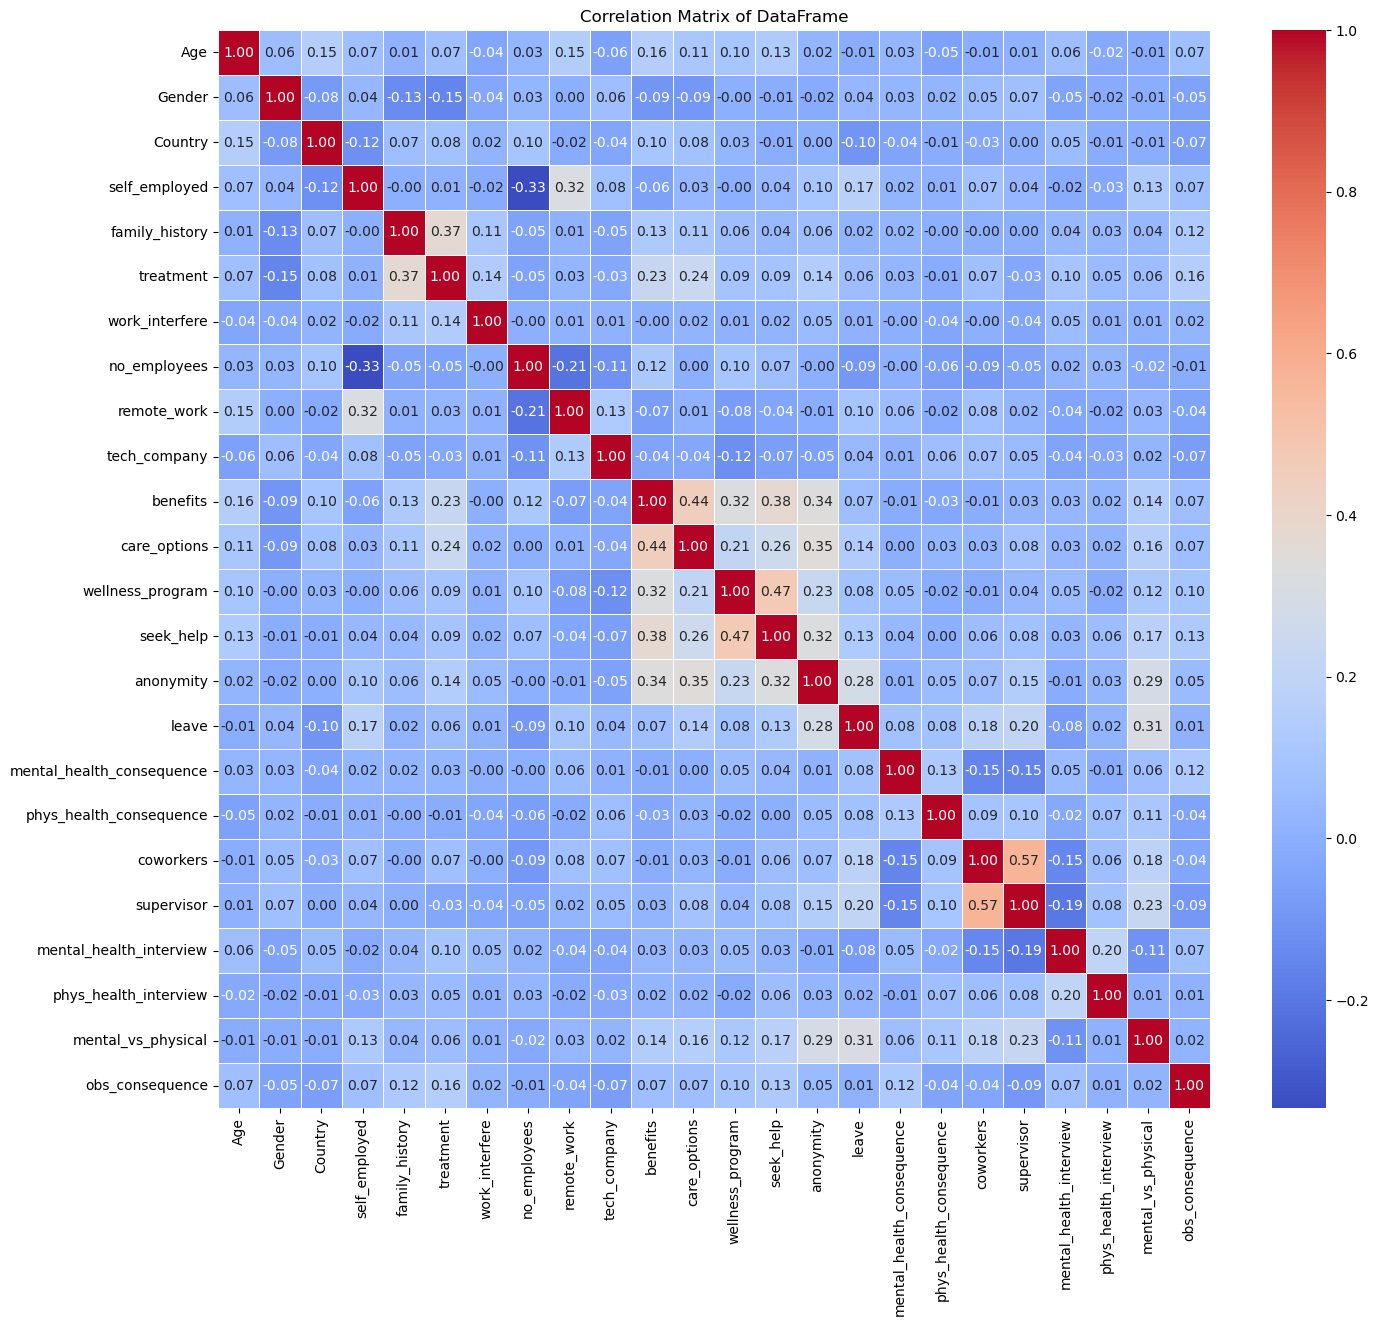

In [26]:
# Create a correlation matrix for the encoded DataFrame
correlation_matrix = df_encode.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title of the plot
plt.title('Correlation Matrix of DataFrame')

# Show the plot
plt.show()